<a href="https://colab.research.google.com/github/skpadhy33/RLProjects/blob/dev%2Fskpadhy33%2FSensorNetworkProblem/WirelessSensorsNetwork/sensor_network_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import networkx as nx
from random import random
from itertools import combinations

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Wireless sensors environment class

class wireless_sensors_env:

  def __init__(self, env_params = {}):
    self.num_nodes = env_params['num_nodes']
    self.probability = env_params['transmission_probability']
    self.min_energy = env_params['min_energy']
    self.max_energy = env_params['max_energy']
    self.current_state = None
    # Set terminal node
    self.terminal_state = self.num_nodes - 1
    # Cunstruct network as per the parameters provided
    self.network = self.construct_valid_network()

  def construct_valid_network(self):
    """ Constructs a valid network. A valid network must have the starting and  terminating nodes connected. """
    network = self.construct_network()
    while not self.is_network_valid(network):
      network = self.construct_network()
    return network

  def is_network_valid(self, network):
    """ We perform DFS on the network to check if there exists a path from the starting node to the terminal node. """
    return self.perform_dfs(network, 0, set())

  def perform_dfs(self, network, current_node, visited_nodes):
    """ Performs DFS of the terminal_node in the connected component of starting state. """
    if self.terminal_state == current_node:
      return True
    visited_nodes.add(current_node)
    adj_nodes = set(network[current_node])
    for node in adj_nodes:
      if node not in visited_nodes:
        if self.perform_dfs(network, node, visited_nodes):
          return True
    return False

  def construct_network(self):
    V = set([v for v in range(self.num_nodes)])
    E = set()
    for combination in combinations(V, 2):
      a = random()
      if a < self.probability:
        # u and v are the two nodes, edge runs from u to v
        u, v = combination
        # w is the cost of transmitting from node u to v
        w = np.random.randint(self.min_energy, self.max_energy)
        E.add((u, v, w))
    # g is a directed graph
    g = nx.DiGraph()
    g.add_nodes_from(V)
    g.add_weighted_edges_from(E)
    return g

  def get_nodes(self):
    return list(self.network.nodes)

  def get_edges(self):
    return list(self.network.nodes)

  def get_adjacency_list(self):
    return [list(self.network[node]) for node in range(self.num_nodes)]

  def draw_network(self):
    pos = nx.spring_layout(self.network)
    # nx.draw(self.network, with_labels=True)
    nx.draw_networkx(self.network) #, pos)
    plt.title("Sensor Network")
    # plt.show()

  def env_start(self):
    """ Called to reset the environment and start over the episode. Returns (state, reward, is_terminal)"""
    self.current_state = 0
    is_terminal = False
    if len(list(self.network[self.current_state])) == 0:
      is_terminal = True
    return self.current_state, 0, is_terminal

  def env_step(self, action):
    """ Called when the agent takes an action. Returns (state, reward, is_terminal) """
    # Check if action is valid
    if (self.current_state, action) not in set(self.network.edges):
      raise Exception('Action seems to not exist for the state')
    # Completion_reward and is_terminal are 1 if resultant state is terminal state
    completion_reward = 0
    is_terminal = False
    if action == self.terminal_state:
      completion_reward = 1
      is_terminal = True
    # Energy reward is negative of the normalized energy units the transmission would take.
    # Thus energy reward is between -1 and 0
    energy = self.network[self.current_state][action]['weight']
    energy_normalized = (energy - self.min_energy) / (self.max_energy - self.min_energy)
    energy_reward = -energy_normalized
    # Reward tuple (completion_reward, energy_reward)
    reward = completion_reward, energy_reward
    # Updating environment's current_state
    self.current_state = action
    # If resultant state has no corresponding action (the signal cannot move ahead), then it would also be considered as terminal state
    if len(list(self.network[self.current_state])) == 0:
      is_terminal = True
    return (self.current_state, reward, is_terminal)


In [ ]:
### Test class ###
# Class to test wireless_sensors_environment class

class test_wireless_sensors_env:
  env_params = {
      'num_nodes': 10,
      'transmission_probability': 0.4,
      'min_energy': 5,
      'max_energy': 10
  }
  for e in range(20):
    print('Environment', e)
    env = wireless_sensors_env(env_params)
    print('Nodes:', env.get_nodes())
    print('Edges:', env.get_edges())
    print('Adjacency List:')
    print(env.get_adjacency_list())
    # env.draw_network()
    for ep in range(5):
      print('Starting episode', ep)
      print('state, action, (completion_reward, energy_reward), is_terminal')
      current_state, _, _ = env.env_start()
      is_terminal = False
      while not is_terminal:
        possible_actions = list(env.network[current_state])
        action = possible_actions[np.random.randint(0, len(possible_actions))]
        next_state, reward, is_t = env.env_step(action)
        print((current_state, action, reward, is_t))
        current_state = next_state
        is_terminal = is_t

Environment 0
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Adjacency List:
[[5, 9, 4], [3], [3], [9, 7], [6, 5], [9], [7, 8], [8, 9], [9], []]
Starting episode 0
state, action, (completion_reward, energy_reward), is_terminal
(0, 4, (0, -0.2), False)
(4, 6, (0, -0.8), False)
(6, 7, (0, -0.6), False)
(7, 8, (0, -0.0), False)
(8, 9, (1, -0.8), True)
Starting episode 1
state, action, (completion_reward, energy_reward), is_terminal
(0, 5, (0, -0.4), False)
(5, 9, (1, -0.0), True)
Starting episode 2
state, action, (completion_reward, energy_reward), is_terminal
(0, 5, (0, -0.4), False)
(5, 9, (1, -0.0), True)
Starting episode 3
state, action, (completion_reward, energy_reward), is_terminal
(0, 9, (1, -0.2), True)
Starting episode 4
state, action, (completion_reward, energy_reward), is_terminal
(0, 4, (0, -0.2), False)
(4, 5, (0, -0.8), False)
(5, 9, (1, -0.0), True)
Environment 1
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Adjace

In [ ]:
# Expected Sarsa and Q learning Agent Class

class expected_sarsa_or_q_learning_agent:

  def __init__(self, agent_init_info = {}):
    """ Setup for the agent called when the experiment first starts. """
    self.env = agent_init_info['env']
    self.num_states = agent_init_info["num_states"]
    self.expected_sarsa_or_q_learning_switch = agent_init_info['expected_sarsa_or_q_learning_switch']
    self.num_training_episodes = agent_init_info['num_training_episodes']
    self.num_test_runs = agent_init_info['num_test_runs']
    self.step_size = agent_init_info["step_size"]
    self.discount = agent_init_info["discount"]
    self.beta = agent_init_info['beta']
    self.adjacency_list_of_states = agent_init_info['adjacency_list_of_states']
    self.print_episode_interval = agent_init_info['print_episode_interval']
    self.current_episode = -1
    self.epsilon = 1
    self.training_return_values = []
    self.training_successes = []
    self.training_energy_cost = []
    self.test_return_values = []
    self.test_successes = 0
    self.test_energy_cost = []
    # The Q-Table would be a list of dictionaries, with each dictionary corresponding to a state and each entry in the dictionary corresponding to the reward for taking an action (an adjacent node) at that state.
    self.q_values = [dict() for _ in range(self.num_states)]
    ## Initializing all action-values to 0.
    for state in range(self.num_states):
      for action in self.adjacency_list_of_states[state]:
        self.q_values[state][action] = 0

  def argmax(self, q_values_for_state):
    """argmax with random tie-breaking.
    Args:
      q_values_for_state: (dict): dict of {action: q_values} for a particular state.
    Returns:
      action (int): greedy action with random tie breaking
    """
    possible_actions = list(q_values_for_state.keys())
    top = float("-inf")
    ties = []
    for action in possible_actions:
      if q_values_for_state[action] > top:
        top = q_values_for_state[action]
        ties = []
      if q_values_for_state[action] == top:
        ties.append(action)
    random_argmax = ties[np.random.randint(len(ties))]
    return random_argmax

  def get_aggregate_reward(self, reward):
    """ Call to get an aggregate reward from the different rewards generated by the environment.  """
    completion_reward, energy_reward = reward
    return self.beta * completion_reward + (1 - self.beta) * energy_reward

  def agent_start(self, observation):
    """ The first method called when the episode starts, called after the environment starts.
    Arguments:
      observation (int): the state from the environment's env.start() method
    Returns:
      the first action taken by the agent.
    """
    state = observation
    q_values_for_current_state = self.q_values[state]
    # Returning a greedy action with epsilon probability
    if np.random.random() <self.epsilon:
      possible_actions = list(q_values_for_current_state.keys())
      action = possible_actions[np.random.randint(len(possible_actions))]
    else:
      action = self.argmax(q_values_for_current_state)
    self.prev_state = state
    self.prev_action = action
    return action

  def agent_step(self, observation, reward):
    """A step taken by the agent.
    Args:
      observation (int): state observation of the environment.
      reward (float): reward received from the environment for taking the previous step
    Returns:
      action (int): the action the agent is taking
    """
    state = observation
    q_values_for_current_state = self.q_values[state]
    # Choosing a greedy action with epsilon probability
    if np.random.random() <self.epsilon:
      possible_actions = list(q_values_for_current_state.keys())
      action = possible_actions[np.random.randint(len(possible_actions))]
    else:
      action = self.argmax(q_values_for_current_state)
    # Updating q_values
    if self.expected_sarsa_or_q_learning_switch == 0:
      # Going with Expected Sarsa
      # expected_return = (epsilon / num_possible_actions_for_state) * (return for all actions) + (1 - epsilon) * (return for argmax action)
      expected_return = 0
      for r in list(q_values_for_current_state.values()):
        expected_return += self.epsilon * r / len(q_values_for_current_state)
      expected_return += np.max(len(q_values_for_current_state.values()))
      self.q_values[self.prev_state][self.prev_action] = self.q_values[self.prev_state][self.prev_action] + self.step_size * (reward + self.discount * expected_return - self.q_values[self.prev_state][self.prev_action])
    else:
      # Going with Q-Learning
      greedy_return = np.max(list(q_values_for_current_state.values()))
      self.q_values[self.prev_state][self.prev_action] = self.q_values[self.prev_state][self.prev_action] + self.step_size * (reward + self.discount * greedy_return - self.q_values[self.prev_state][self.prev_action])
    self.prev_state = state
    self.prev_action = action
    return action

  def agent_end(self, reward):
    """Run when the agent terminates.
    Args:
      reward (float): the reward the agent received for entering the terminal state
    """
    if self.expected_sarsa_or_q_learning_switch == 0:
      # Going with Expected Sarsa
      self.q_values[self.prev_state][self.prev_action] = self.q_values[self.prev_state][self.prev_action] + self.step_size * (reward - self.q_values[self.prev_state][self.prev_action])
    else:
      # Going with Q-Learning
      self.q_values[self.prev_state][self.prev_action] = self.q_values[self.prev_state][self.prev_action] + self.step_size * (reward - self.q_values[self.prev_state][self.prev_action])

  def update_epsilon(self):
    """ Call to compute and get the value of epsilon.  """
    return 1 - (self.current_episode / self.num_training_episodes)

  def agent_policy(self, state):
    """ Call to get the action for a given state as per the policy learnt by the agent. """
    return self.argmax(self.q_values[state])

  def run_training_episode(self):
    """ Call to run an episode. """
    self.current_episode += 1
    self.epsilon = self.update_epsilon()
    # Starting the episode
    observation, reward, is_terminal = self.env.env_start()
    if is_terminal:
      return
    action = self.agent_start(observation)
    observation, reward, is_terminal = self.env.env_step(action)
    energy_cost = reward[1]
    return_value = self.get_aggregate_reward(reward)
    while is_terminal == False:
      action = self.agent_step(observation, self.get_aggregate_reward(reward))
      observation, reward, is_terminal = self.env.env_step(action)
      return_value += self.discount * self.get_aggregate_reward(reward)
      energy_cost += reward[1]
    self.agent_end(self.get_aggregate_reward(reward))
    self.training_return_values.append(return_value)
    self.training_successes.append(reward[0])
    self.training_energy_cost.append(energy_cost)

  def agent_train(self):
    """ Call to train the agent """
    for training_episode_num in range(self.num_training_episodes):
      self.run_training_episode()
      if training_episode_num % self.print_episode_interval == 0 and training_episode_num != 0:
        print('Training episode:', training_episode_num)
        self.run_test_episode(is_print_episode = True)

  def run_test_episode(self, is_print_episode = False):
    """ Call to run a test episode. """
    observation, reward, is_terminal = self.env.env_start()
    action = self.agent_policy(observation)
    if is_print_episode:
      print('Starting episode:')
      print('state:', observation)
      print('action_values:')
      print(self.q_values[observation])
      print('action:', action)
    observation, reward, is_terminal = self.env.env_step(action)
    return_value = self.get_aggregate_reward(reward)
    energy_cost = reward[1]
    if is_print_episode:
      print('reward:', reward)
      print('return_value:', return_value)
    while is_terminal == False:
      action = self.agent_policy(observation)
      if is_print_episode:
        print('state:', observation)
        print('action_values:')
        print(self.q_values[observation])
        print('action:', action)
      observation, reward, is_terminal = self.env.env_step(action)
      return_value += self.discount * self.get_aggregate_reward(reward)
      energy_cost += reward[1]
      if is_print_episode:
        print('reward:', reward)
        print('return_value:', return_value)
    if is_print_episode:
      print('state:', observation)
      print('is_terminal:', is_terminal)
    self.test_return_values.append(return_value)
    self.test_successes += reward[0]
    self.test_energy_cost.append(energy_cost)

  def agent_test(self):
    """ Call to test the policy learned by the agent. """
    # Setting self.test_successes = 0 as it might have been increamented while printing a test episode in middle of training ('print_episode_interval')
    self.test_successes = 0
    for test_ep in range(self.num_test_runs):
      self.run_test_episode()

  def print_log(self):
    """ Prints return values and successes to help to debug """
    print('training_return_values')
    print(self.training_return_values)
    print('training_successes')
    print(self.training_successes )
    print('test_return_values')
    print(self.test_return_values)
    print('test_successes')
    print(self.test_successes )


In [ ]:
### For debugging

def debug_run_training_episode():
  """ Call to debug  an episode run. """
  agent.current_episode += 1
  agent.epsilon = agent.update_epsilon()
  # Starting the episode
  observation, _, is_terminal = agent.env.env_start()
  if is_terminal:
    return
  action = agent.agent_start(observation)
  print('Starting episode:')
  print('state:', observation)
  print('action_values:')
  print(agent.q_values[observation])
  print('action:', action)
  observation, reward, is_terminal = agent.env.env_step(action)
  return_value = agent.get_aggregate_reward(reward)
  print('reward:', reward)
  print('return_value:', return_value)
  while is_terminal == False:
    action = agent.agent_step(observation, agent.get_aggregate_reward(reward))
    print('state:', observation)
    print('action_values:')
    print(agent.q_values[observation])
    print('action:', action)
    observation, reward, is_terminal = agent.env.env_step(action)
    return_value += agent.discount * agent.get_aggregate_reward(reward)
    print('reward:', reward)
    print('return_value:', return_value)
  agent.agent_end(agent.get_aggregate_reward(reward))
  print('state:', observation)
  print('is_terminal:', is_terminal)
  print('action_values:')
  print(agent.q_values[observation])
  agent.training_return_values.append(return_value)
  agent.training_successes.append(reward[0])

print(env.get_adjacency_list())
debug_run_training_episode()
agent.q_values

Average test Success Rate:
100.0 %
Average energy cost:
0.0


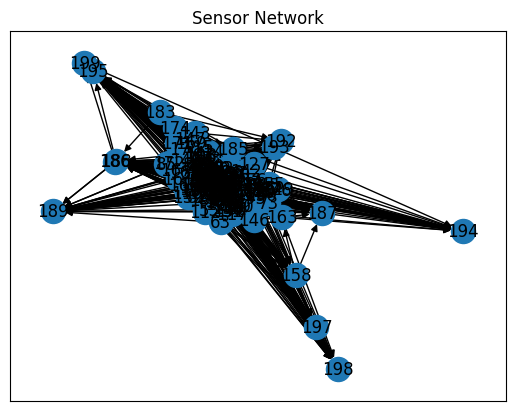

In [ ]:
# Running Experiment

# Common params
num_nodes = 200
expected_sarsa_or_q_learning_switch = 1

# Env params
env_params = {
    'num_nodes': num_nodes,
    'transmission_probability': 0.2,
    'min_energy': 5,
    'max_energy': 10
}
# Initializing environment
env = wireless_sensors_env(env_params)

# Agent params
agent_params = {
    'env': env,
    'num_states': num_nodes,
    'expected_sarsa_or_q_learning_switch': expected_sarsa_or_q_learning_switch,
    'num_training_episodes': 5000,
    'num_test_runs': 10,
    'step_size': 0.01,
    'discount': 0.7,
    'beta': 0.5,
    'adjacency_list_of_states': env.get_adjacency_list(),
    'print_episode_interval': 6000
}
# Initialize the agent
agent = expected_sarsa_or_q_learning_agent(agent_params)

# Train the agent
agent.agent_train()

# Evaluate the policy learnt by the agent
agent.agent_test()

env.draw_network()
print('Average test Success Rate:')
print(100 * agent.test_successes / agent.num_test_runs, '%')
print('Average energy cost:')
print(np.sum(agent.test_energy_cost) / agent.num_test_runs)

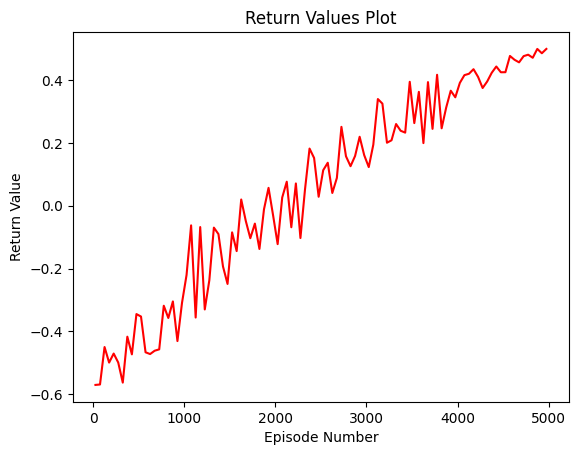

In [ ]:
# Analyzing return values for episodes throughout training

import matplotlib.pyplot as plt_training_return_values

Smoothing_window = 50

training_return_values_smoothened = []
episode_num_smoothened = []
i = 0
while i < len(agent.training_return_values):
    start = i
    end = min(i + Smoothing_window, len(agent.training_return_values) - 1)
    val = np.mean(agent.training_return_values[start:end])
    training_return_values_smoothened.append(val)
    episode_num_smoothened.append((start+end)/2)
    i += Smoothing_window

training_return_values_smoothened = np.array(training_return_values_smoothened)
episode_num_smoothened = np.array(episode_num_smoothened)
plt_training_return_values.title('Return Values Plot')
plt_training_return_values.xlabel('Episode Number')
plt_training_return_values.ylabel('Return Value')
plt_training_return_values.plot(episode_num_smoothened, training_return_values_smoothened, color='red')
plt_training_return_values.show()

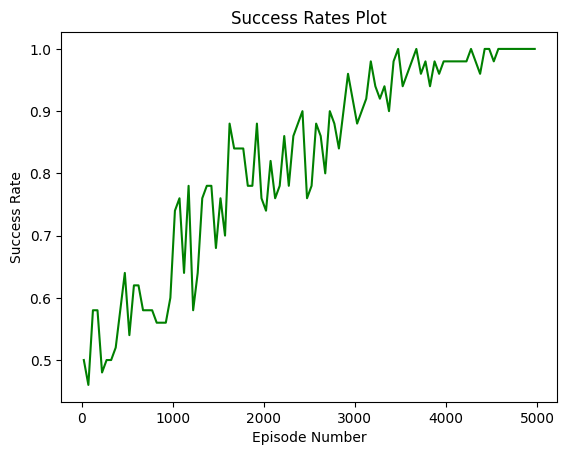

In [ ]:
# Analyzing success rates for episodes throughout training

import matplotlib.pyplot as plt_training_successes

Smoothing_window = 50

training_successes_smoothened = []
episode_num_smoothened = []
i = 0
while i < len(agent.training_successes):
    start = i
    end = min(i + Smoothing_window, len(agent.training_successes) - 1)
    val = np.mean(agent.training_successes[start:end])
    training_successes_smoothened.append(val)
    episode_num_smoothened.append((start+end)/2)
    i += Smoothing_window

training_successes_smoothened = np.array(training_successes_smoothened)
episode_num_smoothened = np.array(episode_num_smoothened)
plt_training_successes.title('Success Rates Plot')
plt_training_successes.xlabel('Episode Number')
plt_training_successes.ylabel('Success Rate')
plt_training_successes.plot(episode_num_smoothened, training_successes_smoothened, color='green')
plt_training_successes.show()

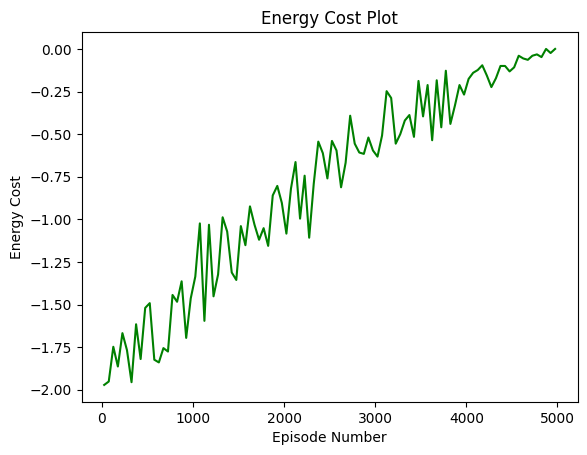

In [ ]:
# Analyzing energy cost for episodes throughout training

import matplotlib.pyplot as plt_training_energy_cost

Smoothing_window = 50

training_energy_cost_smoothened = []
episode_num_smoothened = []
i = 0
while i < len(agent.training_energy_cost):
    start = i
    end = min(i + Smoothing_window, len(agent.training_energy_cost) - 1)
    val = np.mean(agent.training_energy_cost[start:end])
    training_energy_cost_smoothened.append(val)
    episode_num_smoothened.append((start+end)/2)
    i += Smoothing_window

training_energy_cost_smoothened = np.array(training_energy_cost_smoothened)
episode_num_smoothened = np.array(episode_num_smoothened)
plt_training_energy_cost.title('Energy Cost Plot')
plt_training_energy_cost.xlabel('Episode Number')
plt_training_energy_cost.ylabel('Energy Cost')
plt_training_energy_cost.plot(episode_num_smoothened, training_energy_cost_smoothened, color='green')
plt_training_energy_cost.show()

In [ ]:
min_q = float('inf')
max_q = float('-inf')
for u in range(len(agent.q_values)):
  for v in list(agent.q_values[u]):
    min_q = min(min_q, agent.q_values[u][v])
    max_q = max(max_q, agent.q_values[u][v])
print('min_q', min_q)
print('max_q', max_q)
agent.run_test_episode(is_print_episode=True)

# # Analyzing energy cost for episodes throughout training

# import matplotlib.pyplot as plt_training_energy_cost

# Smoothing_window = 50

# training_energy_cost_smoothened = []
# episode_num_smoothened = []
# i = 0
# while i < len(agent.training_energy_cost):
#     start = i
#     end = min(i + Smoothing_window, len(agent.training_energy_cost) - 1)
#     val = np.mean(agent.training_energy_cost[start:end])
#     training_energy_cost_smoothened.append(val)
#     episode_num_smoothened.append((start+end)/2)
#     i += Smoothing_window

# training_energy_cost_smoothened = np.array(training_energy_cost_smoothened)
# episode_num_smoothened = np.array(episode_num_smoothened)
# plt_training_energy_cost.title('Energy Cost Plot')
# plt_training_energy_cost.xlabel('Episode Number')
# plt_training_energy_cost.ylabel('Energy Cost')
# plt_training_energy_cost.plot(episode_num_smoothened, training_energy_cost_smoothened, color='green')
# plt_training_energy_cost.show()

min_q -0.36885420511923517
max_q 0.49999999999343087
Starting episode:
state: 0
action_values:
{162: -3.4137078120168424e-06, 158: -0.07655588940533875, 115: -0.06330125247388343, 145: -0.08134803119907177, 92: -0.16616600010322372, 179: -0.13481484799846408, 129: -0.09696640245984253, 98: -0.18221207725921143, 78: -0.10908204136076392, 29: -0.10766088077299171, 123: 0.004634227532385781, 54: -0.09151881400153429, 178: -0.1977723340782234, 2: 0.0007713211439077184, 191: -0.0427815441645174, 41: -0.1217308866578526, 170: -0.17763879845217792, 74: -0.10128565854856128, 139: -0.07816750846498884, 169: -0.029293325362290828, 23: -0.14294631466464836, 168: -0.1767147810565357, 182: 0.015330520799636281, 53: -0.08913022159308466, 197: -0.1293847550260639, 64: -0.07892779866139393, 6: -0.04895880431334457, 52: -0.15055501895933282, 86: -0.07842970898827331, 199: 0.49999999999343087, 24: -0.16900228809511536, 138: -0.1103182385460557, 183: 0.010658429403680484, 184: -0.03764746051087999, 37: -

In [ ]:
# Evaluating the agent

class evaluate_agent:

  def __init__(self, num_expt, num_trials):
    self.env = None
    self.agent = None
    self.num_expt = num_expt
    self.num_trials = num_trials
    # Common params
    self.num_nodes = 200
    self.expected_sarsa_or_q_learning_switch = 1
    # Env params
    self.env_params = {
        'num_nodes': self.num_nodes,
        'transmission_probability': 0.4,
        'min_energy': 5,
        'max_energy': 10
    }
    # Agent Params
    self.agent_params = {
        'env': None,
        'num_states': num_nodes,
        'expected_sarsa_or_q_learning_switch': expected_sarsa_or_q_learning_switch,
        'num_training_episodes': 5000,
        'num_test_runs': 10,
        'step_size': 0.01,
        'discount': 0.7,
        'beta': 1,
        'adjacency_list_of_states': None,
        'print_episode_interval': 6000
    }
    self.success_rate = 0
    self.energy_cost = 0
    self.return_value = 0

  # Initializing environment
  def create_env(self):
    self.env = wireless_sensors_env(self.env_params)
    self.agent_params['env'] = self.env
    self.agent_params['adjacency_list_of_states'] = self.env.get_adjacency_list()

  # Initialize the agent
  def create_agent(self):
    self.agent = expected_sarsa_or_q_learning_agent(self.agent_params)

  # Train the agent
  def agent_train(self):
    self.agent.agent_train()

  # Evaluate the policy learnt by the agent
  def agent_test(self):
    self.agent.agent_test()

  def run_experiment(self):
    for expt in range(self.num_expt):
        # print('Running expt #,', expt)
        self.create_env()
        success_rate = 0
        energy_cost = 0
        return_value = 0
        for trial in range(self.num_trials):
            # print('Performing trial #', trial)
            self.create_agent()
            self.agent_train()
            self.agent_test()
            success_rate += (100 * self.agent.test_successes / self.agent.num_test_runs) / self.num_trials
            energy_cost += (np.sum(self.agent.test_energy_cost) / self.agent.num_test_runs) / self.num_trials
            return_value += (np.sum(self.agent.training_return_values) / self.agent.num_test_runs) / self.num_trials
        self.success_rate += success_rate / self.num_expt
        self.energy_cost += energy_cost / self.num_expt
        self.return_value += return_value / self.num_expt

#   print results
  def print_results(self):
    print('Average Training Success Rate:')
    print(self.success_rate)
    print('Average energy cost:')
    print(self.energy_cost)
    print('Average return value:')
    print(self.return_value)

run_expts = evaluate_agent(50, 5)
run_expts.run_experiment()
run_expts.print_results()

Notes:
01. What about undirected graphs? Would not it make the model more realistic?

NameError: ignored